download tensorflow


In [26]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

download modules

In [27]:
#@title Import relevant modules
import numpy as np
import pandas as pn
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt


import data

In [28]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

create model

In [29]:
def create_model(my_learning_rate):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32,3,input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=32, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.2))
    
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                  loss="sparse_categorical_crossentropy",
                  metrics=['accuracy'])
    return model

train model

In [30]:
def train_model(model, train_features, train_label, epochs, batch_size=None, validation_split=0.1):
    history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                        epochs=epochs, shuffle=True, validation_split=validation_split)
    epochs = history.epoch
    hist = pn.DataFrame(history.history)
    return epochs, hist

plot curve def

In [33]:
def plot_curve(epochs, hist, list_of_metrics):
    plt.figure()
    plt.xlabel("Epochs")
    plt.ylabel("value")

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)

    plt.legend()
    plt.show()
    print("load the plot_curve function")

main

x_train 1..........................


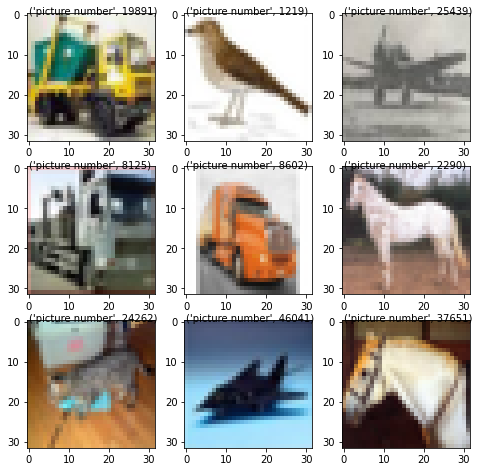

Epoch 1/100
49/49 [==============================] - 33s 678ms/step - loss: 4029.7559 - accuracy: 0.1160 - val_loss: 2.3587 - val_accuracy: 0.0790
Epoch 2/100
49/49 [==============================] - 33s 668ms/step - loss: 2.7031 - accuracy: 0.1006 - val_loss: 2.3352 - val_accuracy: 0.1060
Epoch 3/100
49/49 [==============================] - 33s 669ms/step - loss: 2.3037 - accuracy: 0.0987 - val_loss: 2.3352 - val_accuracy: 0.0790
Epoch 4/100
49/49 [==============================] - 33s 670ms/step - loss: 2.3032 - accuracy: 0.1005 - val_loss: 2.3353 - val_accuracy: 0.0790
Epoch 5/100
49/49 [==============================] - 33s 671ms/step - loss: 2.3027 - accuracy: 0.1004 - val_loss: 2.3355 - val_accuracy: 0.0780
Epoch 6/100
49/49 [==============================] - 33s 672ms/step - loss: 2.3027 - accuracy: 0.1004 - val_loss: 2.3355 - val_accuracy: 0.0780
Epoch 7/100
49/49 [==============================] - 33s 672ms/step - loss: 2.3026 - accuracy: 0.1004 - val_loss: 2.3355 - val_accura

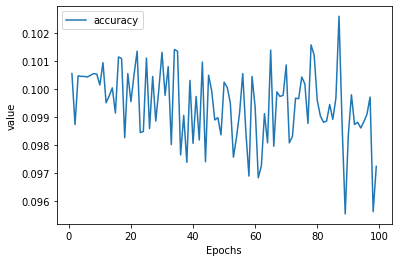

load the plot_curve function
evaluate the new model against the test set: 
10/10 [==============================] - 3s 282ms/step - loss: 2.3018 - accuracy: 0.1000


In [32]:
if __name__ == '__main__':
    #print(unpickle("C:\\Users\\Jett Circuit\\Desktop\\Machinelearning\\cifar-10-batches-py\\data_batch_1"))
    pn.options.display.max_rows = 10
    pn.options.display.float_format = "{:.if}".format
    np.set_printoptions(linewidth=200)
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    #print(x_train[2])
    print("x_train 1..........................")
    fig = plt.figure(figsize=(8, 8))
    columns = 3
    rows = 3

    for i in range(1, columns * rows + 1):
        rand = np.random.randint(1, 50000)
        img = x_train[rand]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        the_text = "picture number", rand
        plt.text(x=0, y=0, s=the_text)

    plt.show()

    learning_rate = 0.003
    epochs = 100
    batch_size = 1000
    validation_split = 0.02

    my_model = create_model(learning_rate)
    epochs, hist = train_model(my_model, x_train, y_train, epochs, batch_size, validation_split)

    list_of_metrics_to_plot = ['accuracy']
    plot_curve(epochs, hist, list_of_metrics_to_plot)

    print("evaluate the new model against the test set: ")
    my_model.evaluate(x=x_test, y=y_test, batch_size=batch_size)

these are some of the result i got with running different parameters

LR-.003: epoch- 100: batch -500: val_split-.02
10ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3028 - val_accuracy: 0.1070
test:
20/20 [==============================] - 0s 7ms/step - loss: 2.3026 - accuracy: 0.1000



LR-.001: epoch- 100: batch -500: val_split-.02
1s 9ms/step - loss: 2.3026 - accuracy: 0.0994 - val_loss: 2.3030 - val_accuracy: 0.0780
test:
20/20 [==============================] - 0s 7ms/step - loss: 2.3026 - accuracy: 0.1000


LR-.003: epoch-50: batch-5000: val_split-.02
1s 75ms/step - loss: 2.3026 - accuracy: 0.1004 - val_loss: 2.3030 - val_accuracy: 0.0790
test:
2/2 [==============================] - 0s 27ms/step - loss: 2.3026 - accuracy: 0.1000


LR-.003: epoch-50: batch-100: val_split-.02
2s 4ms/step - loss: 2.3029 - accuracy: 0.0992 - val_loss: 2.3029 - val_accuracy: 0.0780
test:
100/100 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1000


LR-.003: epoch-50: batch-50: val_split-.02
2s 2ms/step - loss: 2.3030 - accuracy: 0.0984 - val_loss: 2.3019 - val_accuracy: 0.1130
test:
200/200 [==============================] -0s 1ms/step - loss: 2.3029 - accuracy: 0.1000


# **Comments**

1. Using Conv layers would have improved the accuracy. Even chaning the units in dense layers from 32 to 320 would give better accuracy

2. A bigger validation split could be used.

3. Learning rate (lr) search space could be better. For example trying to find optimal lr in [0.1,0.01,0.001] instead of [0.001,0.003]. 

4. If the same tasks of assignment are expected then most of the tasks are missing here. (different number of layers, loss functions, initialization, normalizing the input data ).

Overally, there is no mistake in implementation. But the accuracy of 10% on test data is very less on test dataset and hyperparameters could . Even small changes to the model layers could improve the accuracy.